<a href="https://colab.research.google.com/github/afortuny/DeepLearningFastAI/blob/main/14_Convolutions%20Deep%20Dive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 6.9 MB/s 
     |████████████████████████████████| 1.3 MB 54.1 MB/s 
     |████████████████████████████████| 365 kB 82.6 MB/s 
     |████████████████████████████████| 4.7 MB 43.0 MB/s 
     |████████████████████████████████| 115 kB 83.8 MB/s 
     |████████████████████████████████| 120 kB 84.2 MB/s 
     |████████████████████████████████| 212 kB 71.1 MB/s 
     |████████████████████████████████| 127 kB 82.7 MB/s 
     |████████████████████████████████| 6.6 MB 46.3 MB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

# Convolutional Neural Networks

In this notebook we will dig into what convolutions are and building a CNN from scratch. We will then study a range of techniques to improve training stability and learn all the tweaks the library usually applies for us to get great results

One of the first features that image models try to get is edges on an image. It turns out that finding the edges in an image is a very common task in computer vision, and is surprisingly straightforward. To do it, we use something called a convolution. A convolution requires nothing more than multiplication, and addition—two operations that are responsible for the vast majority of work that we will see in every single deep learning model. A convolution applies a kernel (little matrix) across an image. 

In [3]:
top_edge = tensor([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]]).float()

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)

In [5]:
#hide
Path.BASE_PATH = path

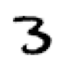

In [6]:
im3 = Image.open(path/'train'/'3'/'12.png')
show_image(im3);

Now we're going to take the top 3×3-pixel square of our image, and multiply each of those values by each item in our kernel. Then we'll add them up, like so:

In [7]:
im3_t = tensor(im3)
im3_t[0:3,0:3] * top_edge

tensor([[-0., -0., -0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [8]:
(im3_t[0:3,0:3] * top_edge).sum()

tensor(0.)